# BIOS 512 Final Project

#### Police Killings in 2015 

While searching for a dataset for this project, I found the 2015 Police Killings intresting as it is an important topic in today's political climate. I found the data set on the FiveThirtyEight data source, which can be found [here](https://github.com/fivethirtyeight/data/tree/master/police-killings). This dataset contains descriptions of who, what, where, and when Police killed Americans in 2015, which include over 400 victims. 

With this data I wanted to look at impact on race/ethnicity, gender, and location of where these killings often happen.

##### Importing Data

In [2]:
library("tidyverse")
policedata = read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  .default = col_character(),
  day = col_double(),
  year = col_double(),
  latitude = col_double(),
  longitude = col_double(),
  state_fp = col_double(),
  county_fp = col_double(),
  tract_ce = col_double(),
  geo_id = col_double(),
  county_id = col_double

#####  Read in data

In [7]:
policedata %>% print

# A tibble: 467 x 34
   name  age   gender raceethnicity month   day  year streetaddress city  state
   <chr> <chr> <chr>  <chr>         <chr> <dbl> <dbl> <chr>         <chr> <chr>
 1 A'do… 16    Male   Black         Febr…    23  2015 Clearview Ln  Mill… AL   
 2 Aaro… 27    Male   White         April     2  2015 300 block Ir… Pine… LA   
 3 Aaro… 26    Male   White         March    14  2015 22nd Ave and… Keno… WI   
 4 Aaro… 25    Male   Hispanic/Lat… March    11  2015 3000 Seminol… Sout… CA   
 5 Adam… 29    Male   White         March    19  2015 364 Hiwood A… Munr… OH   
 6 Adam… 29    Male   White         March     7  2015 18th St and … Phoe… AZ   
 7 Adri… 22    Male   Hispanic/Lat… March    27  2015 4000 Union A… Bake… CA   
 8 Adri… 35    Male   Hispanic/Lat… March    26  2015 1500 Bayview… Wilm… CA   
 9 Alan… 44    Male   White         Janu…    28  2015 Pickett Runn… Suns… TX   
10 Alan… 31    Male   White         Febr…     7  2015 200 Abbie St… Wyom… MI   
# … with 457 more r

## Data Visualizations

I want to clean my data and look at

    1. The top states with Police killings occur 
    2. The impact of Gender and Race in these police killings
    3. The number of killings per month 

##### Location

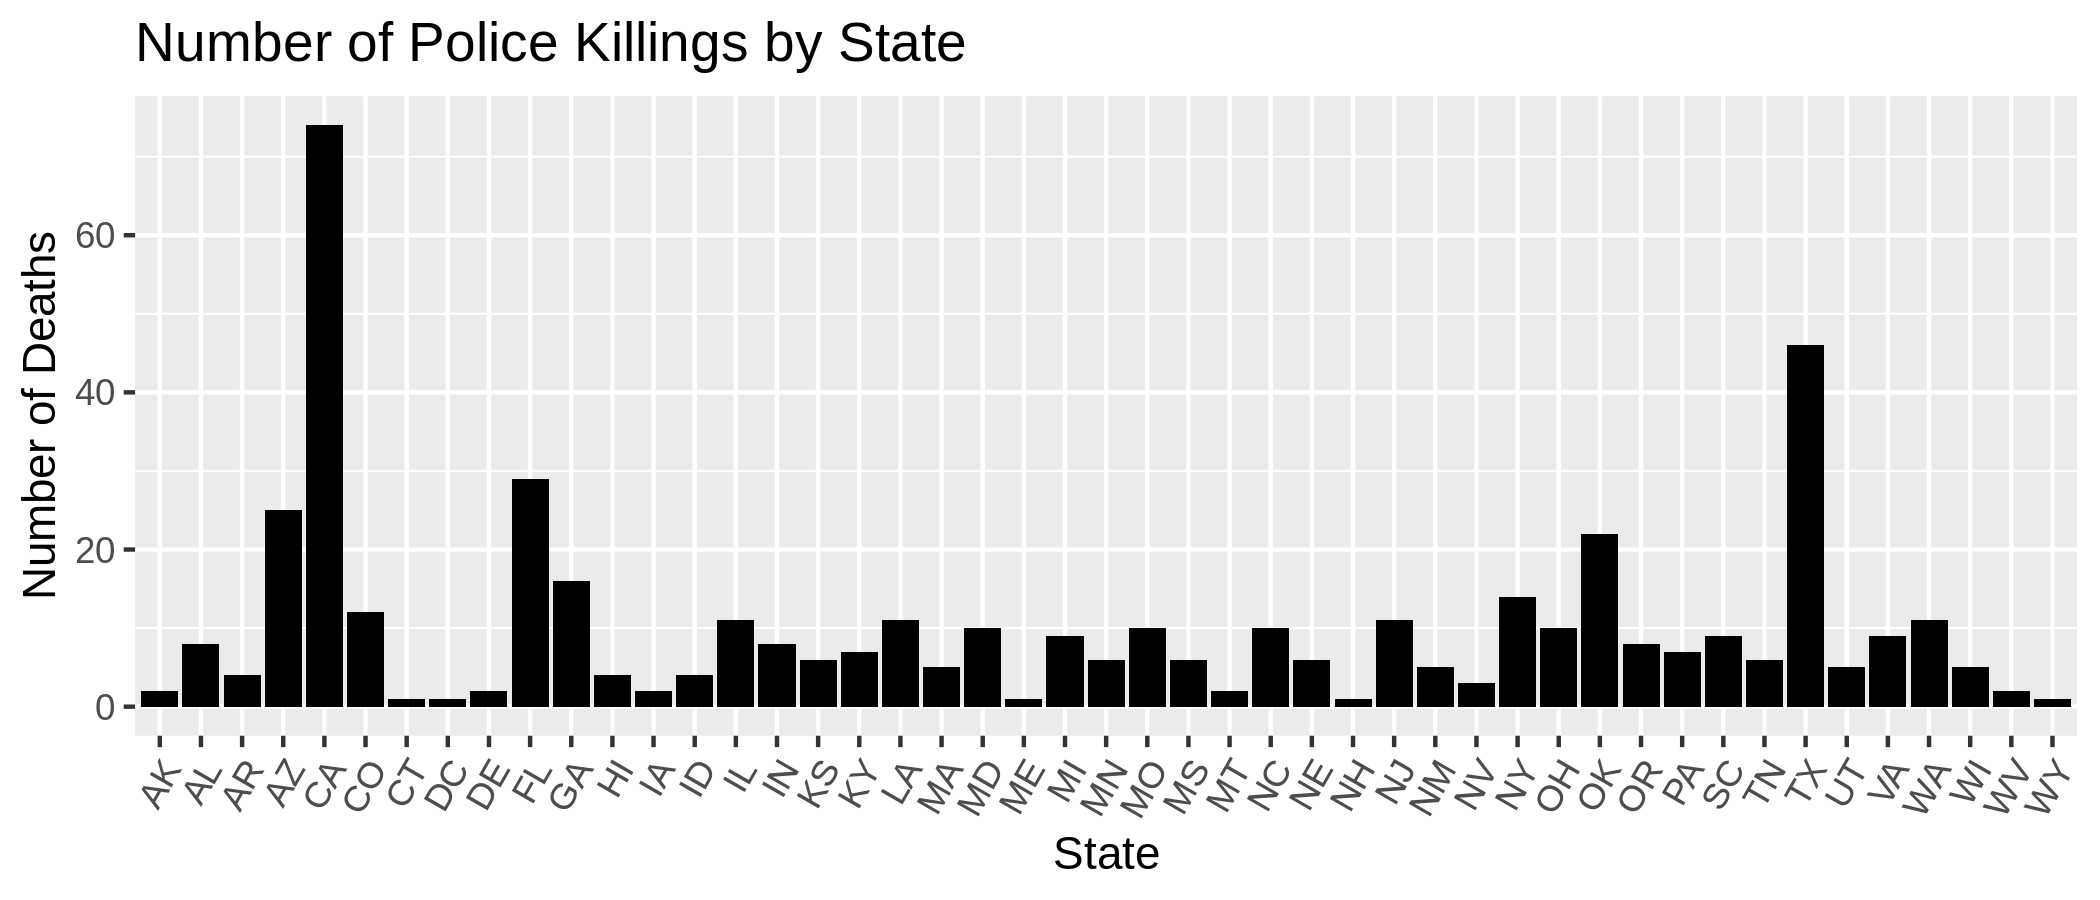

In [8]:
options(repr.plot.width = 7, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(policedata, aes(x = state))

p = p + geom_bar(fill = "black")

p = p + labs(y = "Number of Deaths", x = "State")

p = p + ggtitle("Number of Police Killings by State")

p = p + theme(axis.text.x = element_text(angle = 60, hjust = 1))

p

Here we see that California (CA), Texas (TX), and Florida (FL) have the highest number of police killings. However CA, TX, and FL have the highest population in America as shown [here](https://www.infoplease.com/us/states/state-population-by-rank). Something that stood out to me was that NY has the 4th highest population in the US but as shown in my graph, has a low number of death from police killings.


##### Gender and Race

Here I will at the difference between Gender first

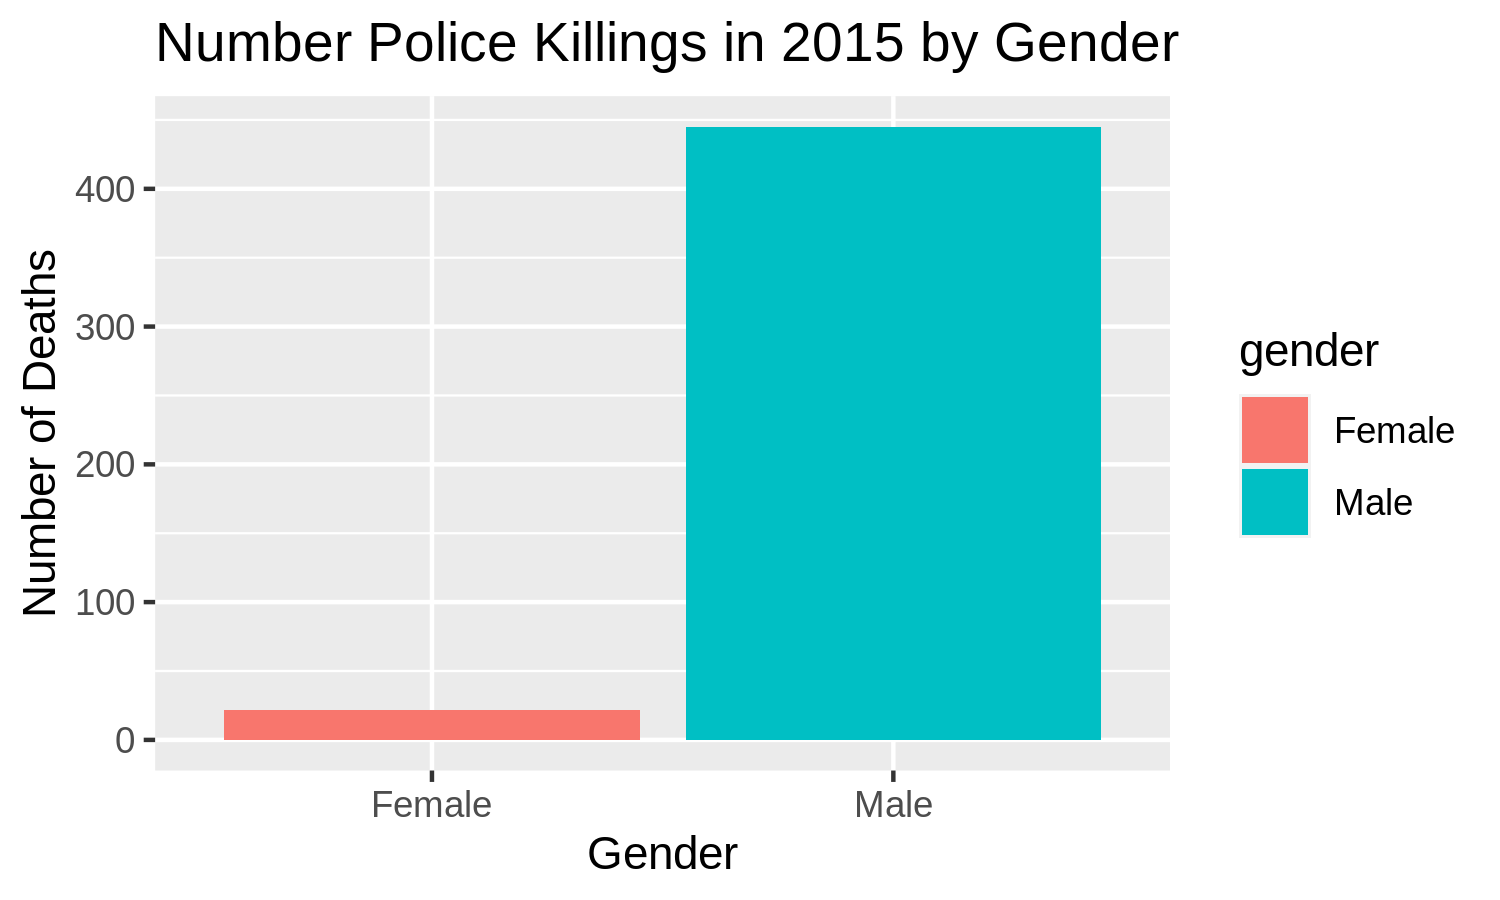

In [9]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)

p = ggplot(policedata, aes(x = gender, fill = gender))

p = p + geom_bar()

p = p + labs(x = "Gender", y = "Number of Deaths")

p = p + ggtitle("Number Police Killings in 2015 by Gender")

p

Here, we can see that overall, there are more males that are killed by police than females which was expected. 

Next, I want to compare ethnicity and race

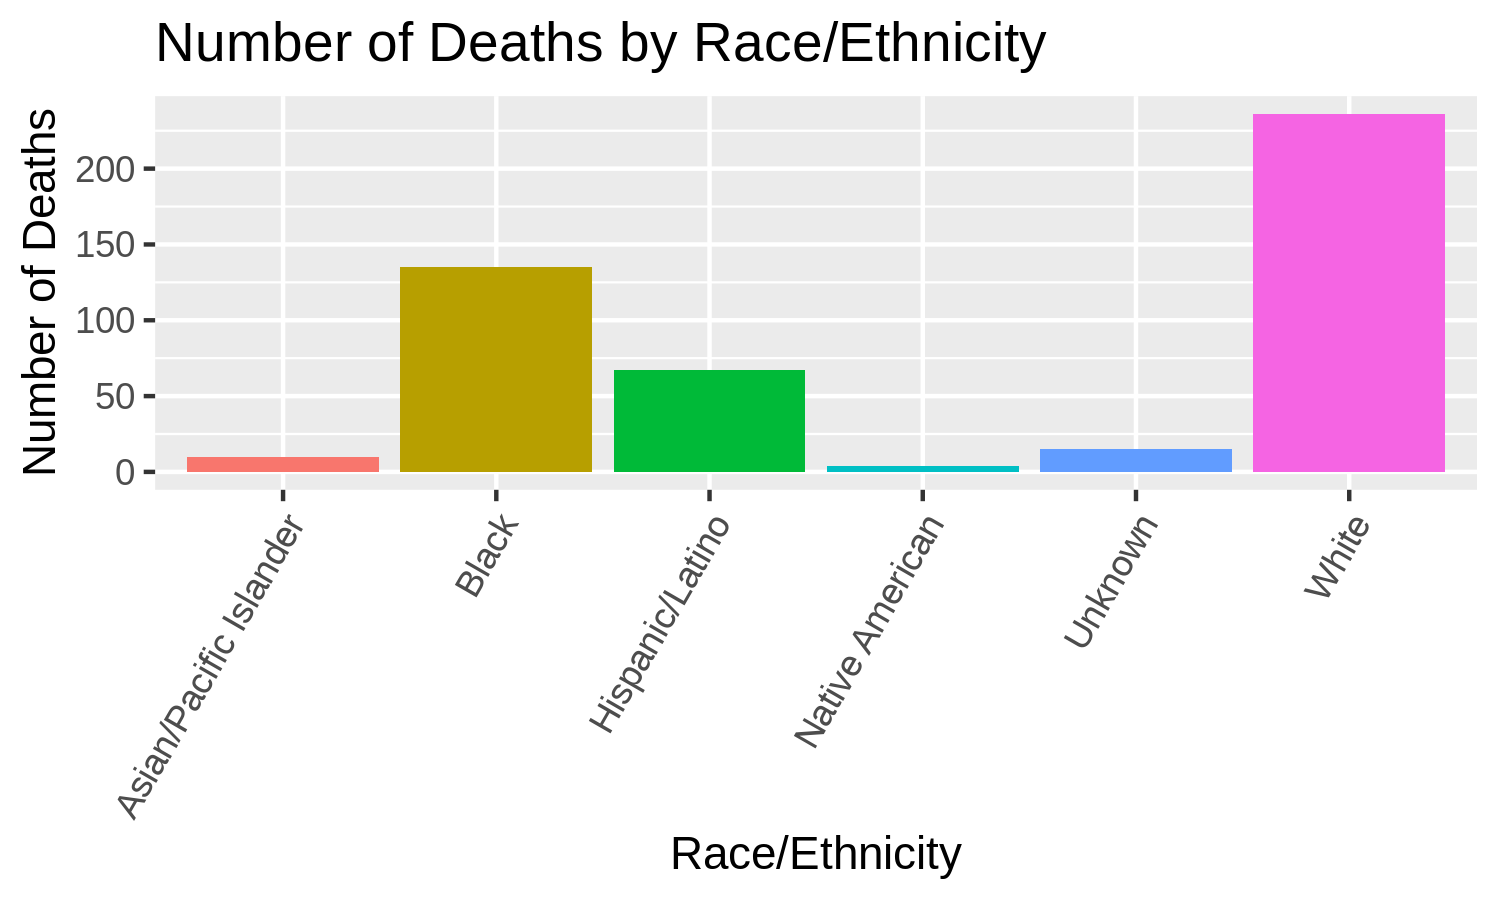

In [10]:
p = ggplot(policedata, aes(x=raceethnicity, fill = raceethnicity))

p = p + geom_bar()

p = p + labs(title = "Number of Deaths by Race/Ethnicity", y = "Number of Deaths", x = "Race/Ethnicity")

p = p + theme(axis.text.x = element_text(angle = 60, hjust = 1))

p = p + theme(legend.position = 'none') 

p

Now, I want to compare Race/Ethnicity with gender. I will create 2 graphs which show the the race/ethncity by gender. 

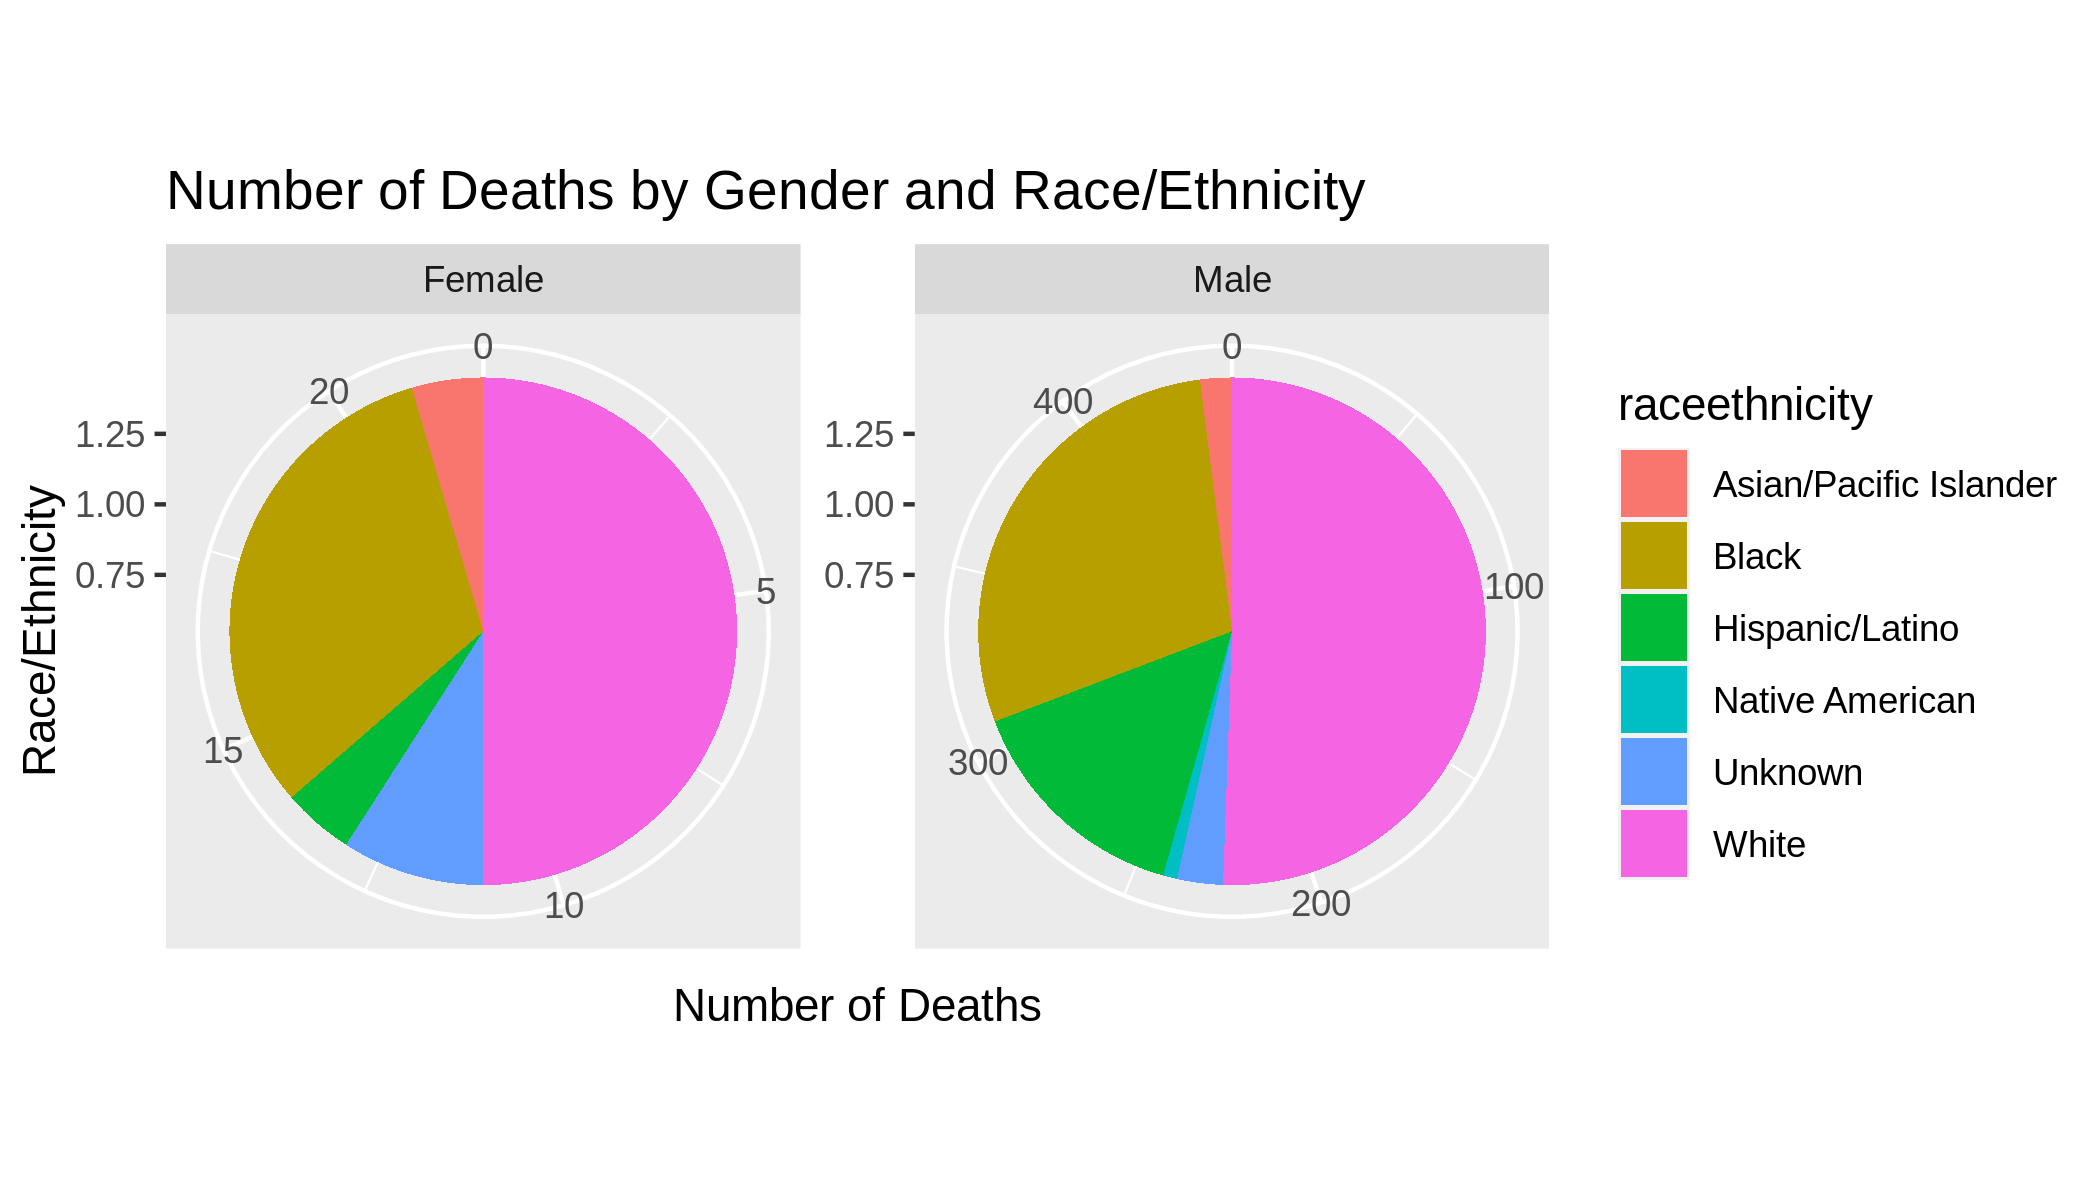

In [31]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)
cp <- coord_polar(theta = "y")
cp$is_free <- function() TRUE

ggplot(policedata, aes(x = 1, fill = raceethnicity)) + 
  geom_bar() +
  cp +
  facet_wrap(~gender, scales = "free") +
  theme(aspect.ratio = 1) + labs(title = "Number of Deaths by Gender and Race/Ethnicity", y = "Number of Deaths", x = "Race/Ethnicity") 

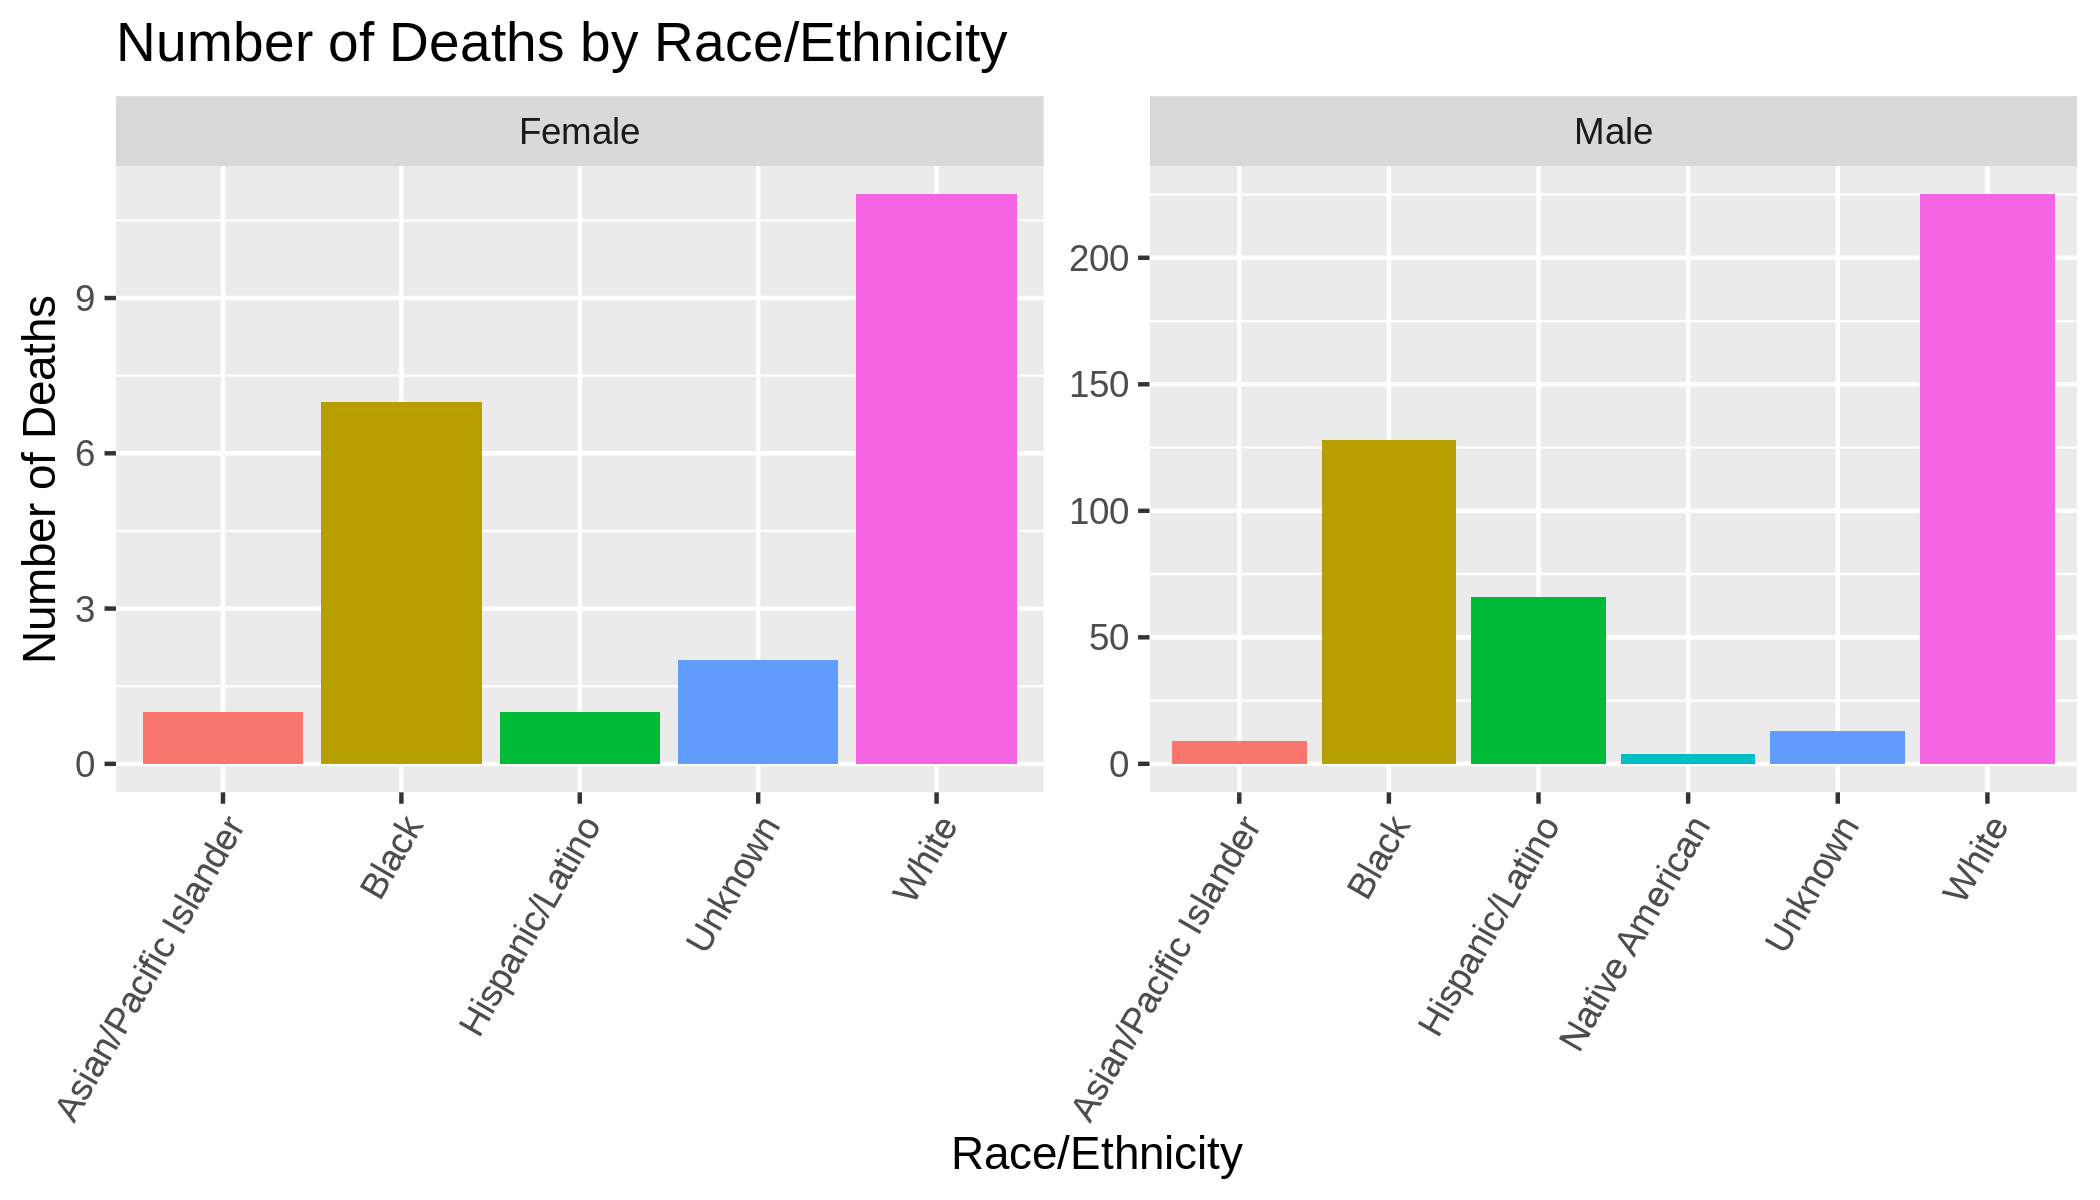

In [17]:
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 300)

p = ggplot(policedata, aes(x=raceethnicity, fill = raceethnicity)) 

p = p + geom_bar()

p = p + labs(title = "Number of Deaths by Race/Ethnicity", y = "Number of Deaths", x = "Race/Ethnicity" )

p = p + theme(axis.text.x = element_text(angle = 60, hjust = 1))

p = p + facet_wrap(~ gender, nrow = 1 , scales = "free")

p = p + theme(legend.position = 'none')

p

The Asian/Pacific Islaner and Hispanic/Latino are close for Female lets take a closer look at it and the other values.

In [41]:
genderrace = policedata %>%
    group_by(raceethnicity, gender) %>%
    count() %>%
    arrange(desc(n)) %>%
    head(11)
  
genderrace

raceethnicity,gender,n
<chr>,<chr>,<int>
White,Male,225
Black,Male,128
Hispanic/Latino,Male,66
Unknown,Male,13
White,Female,11
Asian/Pacific Islander,Male,9
Black,Female,7
Native American,Male,4
Unknown,Female,2


I created a pie chart and bar graph to compare the two genders to see what race is most is most impacted by police killing. We can see from the two graphs for both genders that the White citizens are most likely to be killed followed by Black Citizens. For males the 3rd most likely to be killed by police are Hispanic/Latinos, followed by those from an unknown race/ethnicity (13), and Asian/Pacific Islander (9). For Females the 3rd most likely to be killed by police are those from an unknown race/ethnicity (2), followed by  Asian/Pacific Islander and Hispanic/Latino which are the same number (1). 

##### Number of Killings per Month

Let's first take a look at the Month with the most Killings

In [134]:
topmonth = policedata %>%
    group_by(month) %>%
    count() %>%
    arrange(desc(n)) %>%
    head(12)

topmonth

month,n
<chr>,<int>
March,114
April,96
January,90
February,84
May,81
June,2


We can see the month with the most killings is March.

Next, let us take a look at the days in the each month and see how many were killed on each day and how the trend on each month.

In [101]:
daymonths = policedata %>%
    group_by(month, day) %>%
    count() %>%
    arrange(desc(n))
daymonths

month,day,n
<chr>,<dbl>,<int>
March,17,8
March,27,8
April,15,7
January,14,7
January,16,7
March,19,7
April,8,6
April,21,6
February,4,6


Above we can see March 17th and 27th had the most killings with 8 killings each. 

Below I am graphing the number of killing each day of each month there was a killing.

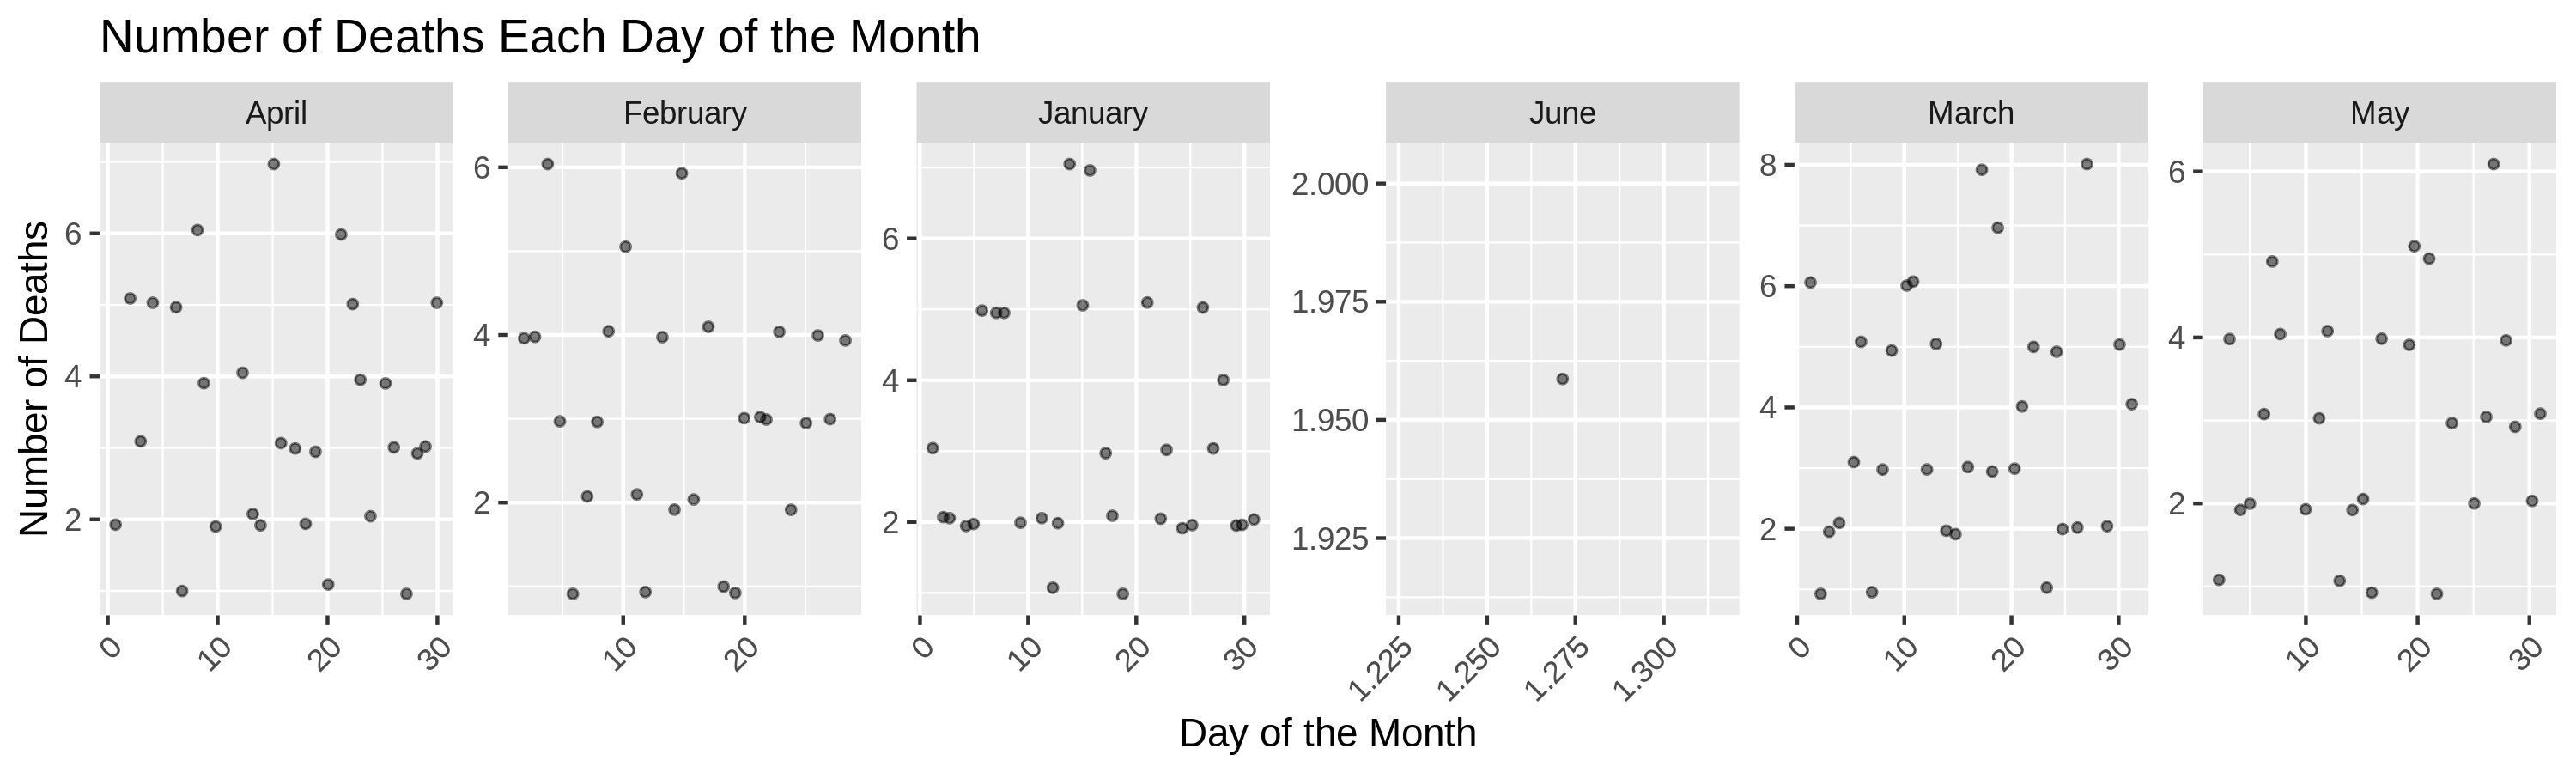

In [121]:
options(repr.plot.width = 10, repr.plot.height = 3)

p = ggplot(daymonths, aes(x= day , y= n))

p = p + geom_point(size = 1, alpha = .5, position = position_jitter(w = .3, h=.1))

p = p + facet_wrap(~ month, nrow = 1 , scales = "free")

p = p + labs(title = "Number of Deaths Each Day of the Month", y = "Number of Deaths", x = "Day of the Month" )

p = p + theme(axis.text.x = element_text(hjust = 1, angle = 45))

p

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



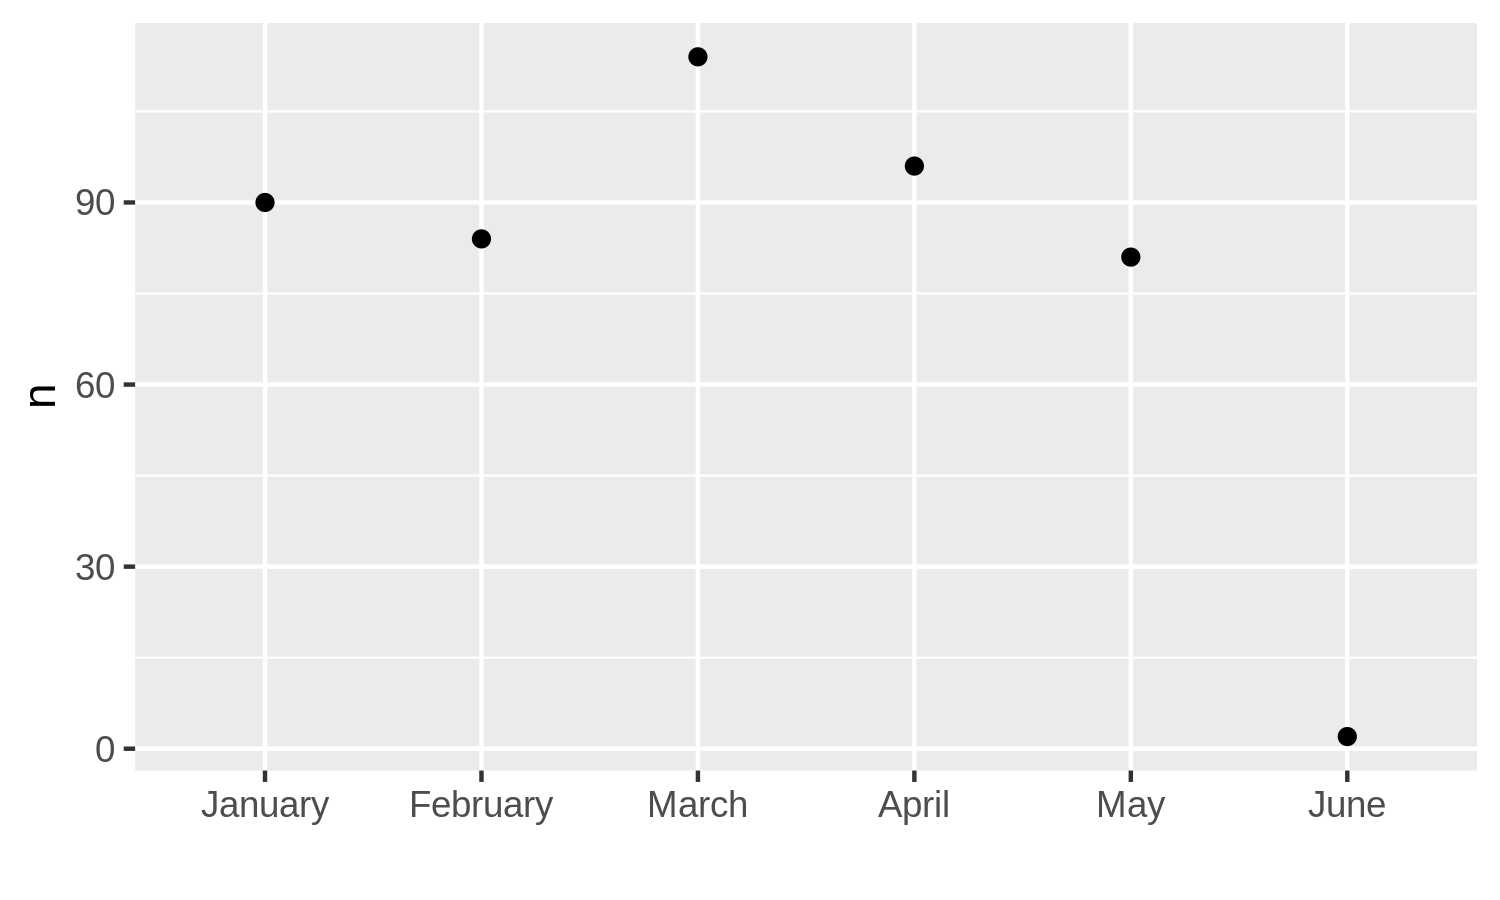

In [159]:
topmonth %>%
  arrange(n) %>%
  mutate(month = factor(month, levels=c("January", "February", "March", "April", "May", "June"))) %>%
  ggplot(aes(x=month, y=n)) +
    geom_line( color="grey") +
    geom_point() +
    xlab("")

options(repr.plot.width = 4, repr.plot.height = 3)


Here we the number of deaths decrease from January to February and increase in March which has the peak number of killings out of all the months in this dataset. As we continue with the graph we see that the number of killings decrease having the lowest in June. 

Overall I think that a lot of data is missing since this dataset only looks at 6 months rather than 12 months. There's is a lot more to look into with this dataset to see the impact of other factors in victims of Police killings. We see that more White people are killed than any other population. This is due to the fact that White Americans are the racial majority. However, according to the [article] (https://fivethirtyeight.com/features/where-police-have-killed-americans-in-2015/) where this data comes from it shows that "Police killings tend to take place in neighborhoods that are poorer and blacker than the U.S. as a whole." 